# Consumer Finances of USA - 2022

### Project Objective

Creating a **Unsupervised ML model**, utilize **K-means** clustering on USA consumer finance data to identify distinct financial clusters, specifically focusing on the credit-fearful group. Apply hyperparameter tuning for optimal cluster determination and employ PCA for enhanced visualization, aiming to provide actionable insights for credit risk assessment and financial management.

### Data Source

The dataset used in this project is sourced from the Federal Reserve's Survey of Consumer Finances (SCF), accessible at https://www.federalreserve.gov/econres/scfindex.htm. The SCF is a comprehensive and authoritative survey capturing detailed information on the finances of U.S. households. 

### Demographics Information Source

For detailed demographics information related to the dataset, the details are offered by the `SDA-University of Berkeley`. This link provides comprehensive insights into demographic variables, contributing to a more nuanced understanding of the population under consideration in the analysis. The source utilized is https://sda.berkeley.edu/sdaweb/docs/scfcomb2022/DOC/hcbk0001.htm. 

# Reading and Importing Data

In [36]:
# Importing Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats.mstats import trimmed_var
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [6]:
# Reading the data from csv
df = pd.read_csv("SCFP2022.csv")
print("df shape", df.shape)
df.head()

df shape (22975, 356)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,3027.956120,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,2,1
1,1,12,3054.900065,2,70,5,9,3,2,2,...,4,2,5,2,1,8,3,3,2,1
2,1,13,3163.637766,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,1,1
3,1,14,3166.228463,2,70,5,9,3,2,2,...,3,2,4,1,1,6,3,2,1,1
4,1,15,3235.624715,2,70,5,9,3,2,2,...,3,2,4,2,1,8,3,3,1,1


The dataset is huge with 22975 rows and 365 columns

**In this Project our main focus will be on `TURNFEAR`**

<img src="image/Turnfear.png"/>

In [7]:
# Creating a subset of 'TURNFEAR' is 1
mask = df["TURNFEAR"] == 1
df_fear = df[mask]
print("df_fear shape", df_fear.shape)
df.head()

df_fear shape (3839, 356)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,3027.956120,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,2,1
1,1,12,3054.900065,2,70,5,9,3,2,2,...,4,2,5,2,1,8,3,3,2,1
2,1,13,3163.637766,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,1,1
3,1,14,3166.228463,2,70,5,9,3,2,2,...,3,2,4,1,1,6,3,2,1,1
4,1,15,3235.624715,2,70,5,9,3,2,2,...,3,2,4,2,1,8,3,3,1,1


Now the data is ready to explore with 3839 rows and 356 columns

# Exploring Data

## AGE

<img src="image/Agecl.png"/>

In [8]:
# Changing the age-group into readable format
agecl_dict = {
    1: "Under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75 or Older",
}

age_cl = df_fear["AGECL"].replace(agecl_dict)
age_cl.head()

20    Under 35
21    Under 35
22    Under 35
23    Under 35
24    Under 35
Name: AGECL, dtype: object

**Now Lets see the distribution of Age group**

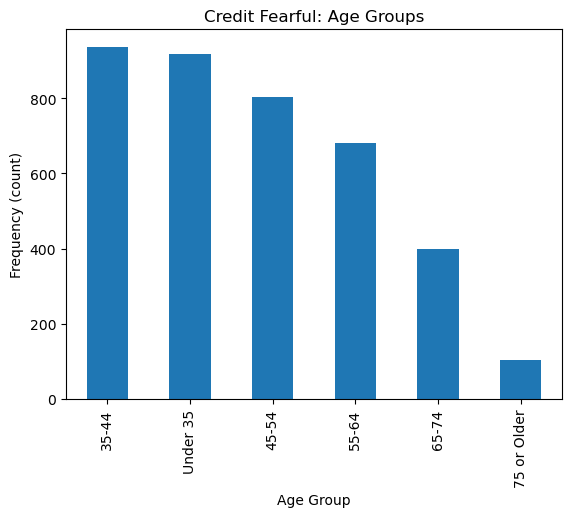

In [9]:
# distribution of age
age_cl_value_counts = age_cl.value_counts()

# Bar plot of `age_cl_value_counts`
age_cl_value_counts.plot(kind="bar",
                        xlabel="Age Group",
                        ylabel="Frequency (count)",
                        title="Credit Fearful: Age Groups");

* Observation: the count is in increasing order except '35-44' and 'Under 35' but showing similar count

**Now we can see what perticular Age is affraid of Credit**

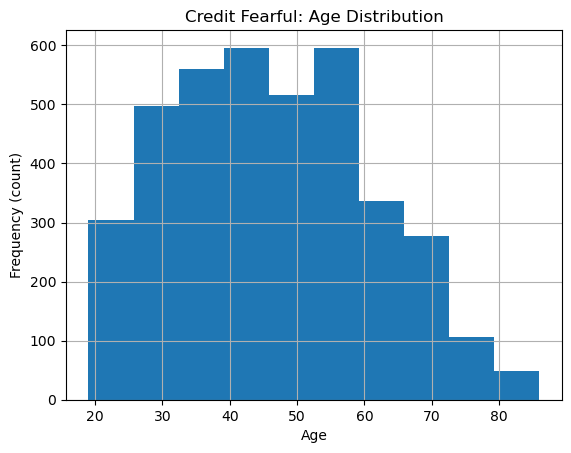

In [10]:
# Plot histogram of "AGE"
df_fear["AGE"].hist(bins=10)
plt.xlabel("Age")
plt.ylabel("Frequency (count)")
plt.title("Credit Fearful: Age Distribution");

* Observation: From age group was showing that the main group was under 44, but the main Age Group is in 25 to 60

## RACE

<img src="image/Race.png"/>

In [11]:
# Changing into understandable form
race_dict = {
    1: "White/Non-Hispanic",
    2: "Black/African-American",
    3: "Hispanic",
    5: "Other",
}
race = df_fear["RACE"].replace(race_dict)

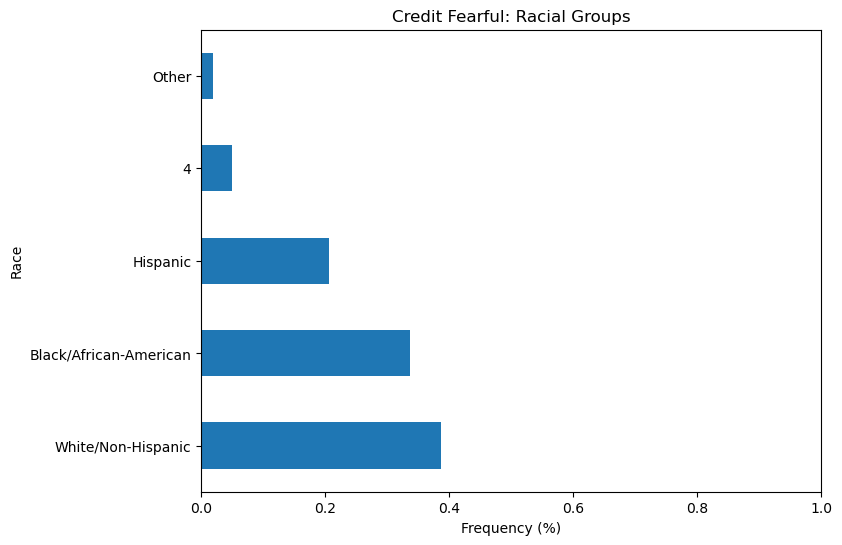

In [12]:
# How lets see the distribution of 'race'
race_value_counts = race.value_counts(normalize=True)
# Create bar chart of race_value_counts
plt.figure(figsize=(8, 6))
race_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("Credit Fearful: Racial Groups");

* Observation - most non-Hispanic people are fearfull of credit

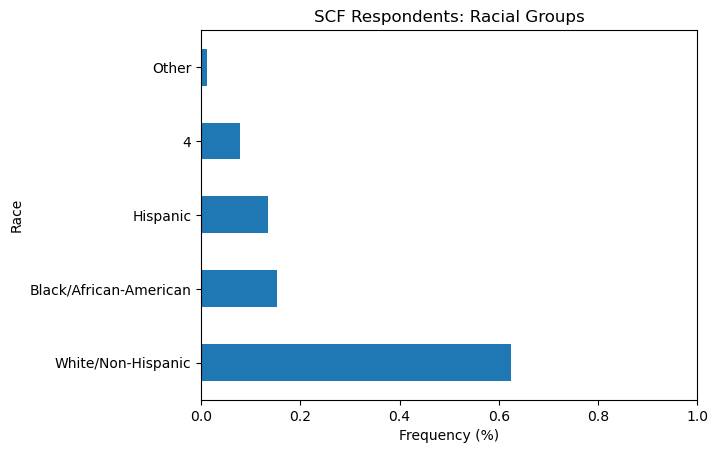

In [13]:
# Lets compare the data with actual data
race = df["RACE"].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("SCF Respondents: Racial Groups");

* Observation: 
1. White/Non-Hispanic are in majority of population and simulatinous it's not affected by fearful or not feared by credit. 
2. On otherside the american and hispanic were more than 20% in feared group but in the actual population is less than and 20%  which shows that the black/african-american and Hispanic were mostly affected by the Credit fear.

## INCOME

<img src="image/Income.png"/>

Creating a side by side graph of income group and Credit fearful group

In [15]:
# making a dataframe of turnfear, and frequency by income group
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

df_inccat = (
    df["INCCAT"]
    .replace(inccat_dict)
    .groupby(df["TURNFEAR"])
    .value_counts(normalize=True)
    .rename("Frequency")
    .to_frame()
    .reset_index()
)
df_inccat

,TURNFEAR,INCCAT,Frequency
0,0,90-100,0.303982
1,0,60-79.9,0.162312
2,0,40-59.9,0.144492
3,0,0-20,0.140050
4,0,21-39.9,0.139162
5,0,80-89.9,0.110002
6,1,0-20,0.340714
7,1,21-39.9,0.266476
8,1,40-59.9,0.205001
9,1,60-79.9,0.112529


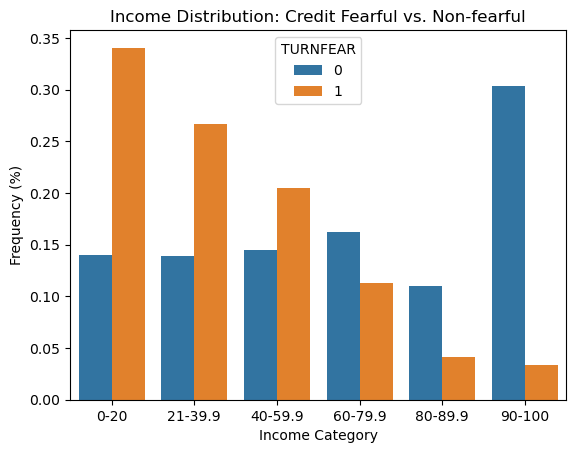

In [18]:
# PLot of dataframe
sns.barplot(
    x="INCCAT",
    y="Frequency",
    hue="TURNFEAR",
    data=df_inccat,
    order=inccat_dict.values()
    
)
plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Credit Fearful vs. Non-fearful");

* Observations: Income showing a clear trend as income increases the credit fearful frequqncy is decreasing

## ASSETS

**Lets compare the correlation of Assets and house price of credit fearful and whole dataset.**

In [20]:
# firstly correlate assets and house price of whole population
asset_house_corr = df["ASSET"].corr(df["HOUSES"])
print("Asset Houses Correlation:", asset_house_corr)

Asset Houses Correlation: 0.5617765465095474


In [21]:
#Now credit fearful group
asset_house_corr = df_fear["ASSET"].corr(df_fear["HOUSES"])
print("Credit fearful: Asset Houses Correlation:", asset_house_corr)

Credit fearful: Asset Houses Correlation: 0.36495454276411665


* Observation: The credit fearful group showing that their asset not mainly in their house price

## Education

<img src="image/Educ.png"/>

In [24]:
# Creating a dataframe of the Education comparing with Turnfear and its frequency
df_educ = (
    df["EDUC"]
    .groupby(df["TURNFEAR"])
    .value_counts(normalize=True)
    .rename("Frequency")
    .to_frame()
    .reset_index()
    
)
df_educ

,TURNFEAR,EDUC,Frequency
0,0,12,0.278689
1,0,8,0.174383
2,0,13,0.158967
3,0,9,0.111727
4,0,14,0.108539
5,0,10,0.049122
6,0,11,0.041283
7,0,7,0.016722
8,0,6,0.012176
9,0,4,0.010974


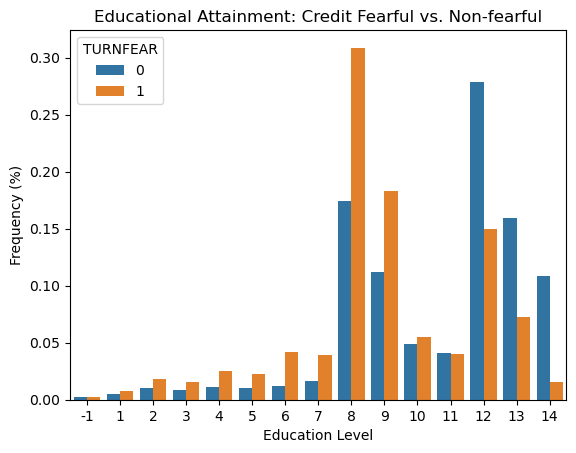

In [25]:
# Now lets plot it
sns.barplot(
    x="EDUC",
    y="Frequency",
    hue="TURNFEAR",
    data=df_educ
    
)
plt.xlabel("Education Level")
plt.ylabel("Frequency (%)")
plt.title("Educational Attainment: Credit Fearful vs. Non-fearful");

* Observations:
1. The most fearful group in education are 8 and 9 which are high-school diploma and some college but not graduate.
2. Under 12 group proportionally the credit fearful people are more.
3. Non fearful group are represented by 12, 13 and 14 group which are university degree, masters degree and phd or professional degree.

## Debt

**Debt Comparision with assets**

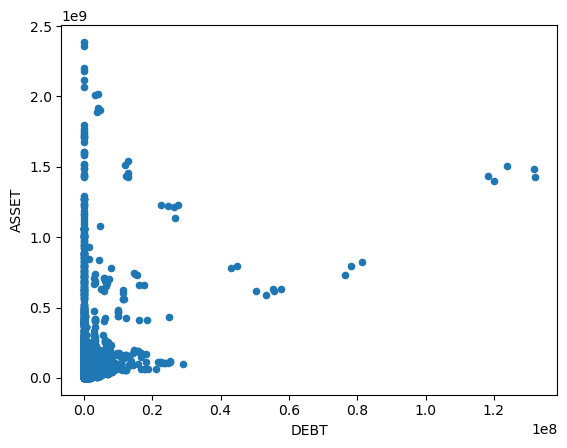

In [27]:
# Create scatter plot of HOUSES vs DEBT, df
df.plot.scatter(x="DEBT", y="ASSET");

* Observation: A group of people showing so much debt but as they have pretty good asset.

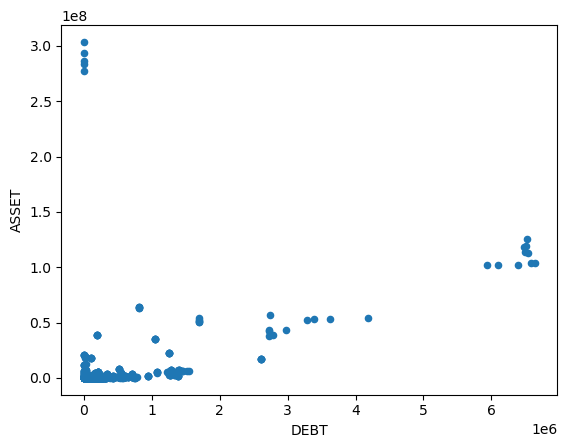

In [30]:
# Now the Credit fearful Group
df_fear.plot.scatter(x="DEBT", y="ASSET");

* Observations:
1. One group is showing high debt compared to the total asset.
2. A group of household have high amount of assets but also credit fearful.

## Features Comparision

**Creating a correlation matrix of columns `"ASSET"`, `"HOUSES"`, `"INCOME"`, `"DEBT"`, and `"EDUC"`.**

In [32]:
# Lets make a correlation matric of entire population
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr = df[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.561777,0.706685,0.307143,0.120139
HOUSES,0.561777,1.000000,0.384699,0.251876,0.186120
INCOME,0.706685,0.384699,1.000000,0.306534,0.096549
DEBT,0.307143,0.251876,0.306534,1.000000,0.086561
EDUC,0.120139,0.186120,0.096549,0.086561,1.000000


* Observations: 
1. Income and assets good correlation in whole population.
2. House and assets also have correlation.

In [33]:
# Credit fearful group correlation
corr = df_fear[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.364955,0.893282,0.477171,0.110659
HOUSES,0.364955,1.000000,0.314501,0.676984,0.195174
INCOME,0.893282,0.314501,1.000000,0.456622,0.108845
DEBT,0.477171,0.676984,0.456622,1.000000,0.182570
EDUC,0.110659,0.195174,0.108845,0.182570,1.000000


* Observations:
1. Income and assets showing higher correlation than entire population for credit fearful.
2. As the price of house get higher then their debt is also getting higher.


# Features Selection


To optimize `unsupervised models`, prioritize numerical features with `substantial variance`. Higher-variance features capture a broader spectrum of values, enhancing their role in discerning diverse patterns within the data. This selection strategy contributes to the overall effectiveness of unsupervised models in uncovering hidden structures and relationships within the dataset.

In [38]:
# lets calculate the top 10 features with largest variance
top_ten_var = df_fear.var().sort_values().tail(10)
top_ten_var

EQUITY      8.272191e+12
FIN         1.324553e+13
KGBUS       3.919372e+13
KGTOTAL     4.611527e+13
ACTBUS      6.441643e+13
BUS         7.182994e+13
NHNFIN      8.296348e+13
NFIN        8.582096e+13
NETWORTH    1.550844e+14
ASSET       1.599419e+14
dtype: float64

In [39]:
# lets plot that in bar-chart
fig = px.bar(
    x = top_ten_var,
    y = top_ten_var.index,
    title = "High Variance Features"
)
fig.update_layout(xaxis_title= "Variance", yaxis_title = "Features")
fig.show()

* Observation: The features are showing very high variance, values are in `trillions` 

**High variance is observed in the feature lets check the distribution of a feature `NFIN`.**

In [40]:
# Distribution of NFIN feature
fig = px.box(
    data_frame=df_fear,
    x="NFIN",
    title="Distribution of Non-home, Non-Financial Assets"
)
fig.update_layout(xaxis_title="Value [$]")
fig.show()

* Observation: Clearly it can be observed that outliers are present and it making the variance so high.

**Solution: Because of the outliers the variance is soo high so we will use `Trimmed Variance.`**

In [41]:
# Calculate trimmed variance
top_ten_trim_var = df_fear.apply(trimmed_var, limits=(0.1, 0.1)).sort_values().tail(10)
top_ten_trim_var

NH_MORT     1.518084e+09
MRTHEL      1.565874e+09
PLOAN1      1.834723e+09
KGTOTAL     2.401795e+09
HOMEEQ      2.729247e+09
DEBT        3.656484e+09
HOUSES      1.115749e+10
NETWORTH    1.170923e+10
NFIN        2.039453e+10
ASSET       2.857839e+10
dtype: float64

In [42]:
# Creating a bar plot of trimmed variance features
fig = px.bar(
    x = top_ten_trim_var,
    y = top_ten_trim_var.index,
    title = "High Trimmed Variance Features"
)
fig.update_layout(xaxis_title="Trimmed Variance", yaxis_title="Features")
fig.show()

* Observation: The value decrease now they are in `Billions`

**Generating a list of high_var with the column names of the five features with the highest trimmed variance.**

In [44]:
high_var = top_ten_trim_var.tail(5).index.to_list()
high_var

['DEBT', 'HOUSES', 'NETWORTH', 'NFIN', 'ASSET']

# Model Building

## Feature Matrix

In [45]:
# Creating a Feature Matrix
X = df_fear[high_var]
print("X shape:", X.shape)
X.head()

X shape: (3839, 5)


,DEBT,HOUSES,NETWORTH,NFIN,ASSET
20,11000,0,4100.0,14000.0,15100.0
21,10000,0,5500.0,14000.0,15500.0
22,10000,0,4500.0,13000.0,14500.0
23,10000,0,5600.0,14000.0,15600.0
24,11000,0,4500.0,14000.0,15500.0


## Feature's Pre-processing

Lets compare the features and compatibility as `X_summary`

In [47]:
X_summary = X.aggregate(["mean", "std"]).astype(int)
X_summary

,DEBT,HOUSES,NETWORTH,NFIN,ASSET
mean,116769,153379,1335827,1012787,1452597
std,416861,523045,12453290,9263960,12646814


* In our dataset, features exhibit variations in mean and standard deviation values. `Standardization` addresses this by scaling all features to a common range, ensuring k-means isn't biased towards those with larger scales. This enhances algorithm robustness, convergence, and interpretation of resulting clusters.

In [48]:
# Standarization of features by using StandardScaler
ss = StandardScaler()

# Transform `X`
X_scaled_data = ss.fit_transform(X)

# Put `X_scaled_data` into DataFrame
X_scaled = pd.DataFrame(X_scaled_data, columns=X.columns)

print("X_scaled shape:", X_scaled.shape)
X_scaled.head()

X_scaled shape: (3839, 5)


,DEBT,HOUSES,NETWORTH,NFIN,ASSET
0,-0.253762,-0.29328,-0.106952,-0.107828,-0.113680
1,-0.256161,-0.29328,-0.106839,-0.107828,-0.113648
2,-0.256161,-0.29328,-0.106920,-0.107936,-0.113727
3,-0.256161,-0.29328,-0.106831,-0.107828,-0.113640
4,-0.253762,-0.29328,-0.106920,-0.107828,-0.113648


The data is `Standarized` now let's see the `X_summary`

In [49]:
X_scaled_summary = X_scaled.aggregate(["mean", "std"]).astype(int)
X_scaled_summary

,DEBT,HOUSES,NETWORTH,NFIN,ASSET
mean,0,0,0,0,0
std,1,1,1,1,1


* As we can see the complete data is standarized now and ready to model building.

## Hyper-Parameter Tuning

Hyperparameter tuning is a crucial step in optimizing the performance of the k-means clustering algorithm. Silhouette score and inertia are two key metrics used for this purpose. Silhouette score measures the cohesion and separation of clusters, with higher scores indicating better-defined clusters. In contrast, inertia reflects the sum of squared distances between data points and their assigned cluster centers. A lower inertia suggests denser, more compact clusters. By systematically adjusting hyperparameters and observing the impact on these metrics, we can fine-tune the model for optimal clustering results, achieving a balance between silhouette score and inertia for more meaningful and accurate cluster assignments.

Now we will train the model at 10 different values of cluster and calculate the `Silhouette Score` and `Inertia`, then we will compare it and find the best value of the clusters.

In [52]:
# making list of inertia and silhouette scores
n_clusters = range(2, 13)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for f in n_clusters:
    model = make_pipeline(StandardScaler(), KMeans(n_clusters=f, n_init=10, random_state=42))
    model.fit(X)
    inertia_errors.append(model.named_steps["kmeans"].inertia_)
    silhouette_scores.append(silhouette_score(X, model.named_steps["kmeans"].labels_))
print("Inertia:", inertia_errors[:3])
print()
print("Silhouette Scores:", silhouette_scores[:3])

Inertia: [9173.195116944944, 4549.582964735445, 3247.028327262952]

Silhouette Scores: [0.9812912050202599, 0.9742587024816097, 0.9650724590346714]


### Interia

In k-means clustering, determining the optimal number of clusters involves analyzing the inertia, which measures within-cluster sum of squares. As clusters increase, inertia decreases; however, identifying an elbow point in the inertia graph signifies the optimal cluster count. This elbow represents a balance between minimizing inertia and preventing over-segmentation, guiding the selection of an efficient and meaningful clustering solution.

In [53]:
# Create line plot of `inertia_errors` vs `n_clusters`
fig = px.line(
    x=n_clusters, y=inertia_errors, title="K-Means Model: Inertia vs Number of Clusters"
)
fig.update_layout(xaxis_title="Number of Clusters (k)", yaxis_title="Inertia")
fig.show()

* Observation: The best value according to interia curve is 4 or 5 numbers of clusters

### Silhouette Score

Silhouette score is another key metric for assessing clustering performance. It quantifies how well-separated clusters are, with values ranging from -1 to 1. A higher silhouette score indicates better-defined clusters. By systematically varying the number of clusters and observing the corresponding silhouette scores, we can identify the optimal number of clusters that maximizes cohesion within clusters and separation between them. 

In [54]:
# Create a line plot of `silhouette_scores` vs `n_clusters`
fig = px.line(
    x=n_clusters, y=silhouette_scores, title="K-Means Model: Silhouette Score vs Number of Clusters"
)
fig.update_layout(xaxis_title="Number of Clusters (k)", yaxis_title="Silhouette Score")

fig.show()

* Observation: Its showing that the best choice will be 4 for our `k-Means model`. 

### Final Model

In [56]:
# creating k-means model in pipeline with standardscaler
final_model = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=4, n_init=10, random_state=42)
)
final_model.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4, n_init=10, random_state=42))])

# Communication

Extracting the labels that your `final_model` created during training and assign them to the variable `labels`.

In [57]:
labels = final_model.named_steps["kmeans"].labels_
print(labels[:5])

[0 0 0 0 0]


We are going to observe this in a visualization so making its dataframe

In [58]:
# Create a DataFrame xgb 
xgb = X.groupby(labels).mean()
xgb

,DEBT,HOUSES,NETWORTH,NFIN,ASSET
0,8.156108e+04,1.087994e+05,3.543054e+05,2.864714e+05,4.358664e+05
1,6.421700e+06,2.993000e+06,1.037628e+08,7.432762e+07,1.101845e+08
2,0.000000e+00,5.710000e+05,2.887856e+08,2.161110e+08,2.887856e+08
3,1.885878e+06,3.608500e+06,3.264984e+07,2.450632e+07,3.453571e+07


In [59]:
# let's make a bar chart and see how our clusters differ.
fig = px.bar(
    xgb,
    barmode="group",
    title="Mean Household Finances by Cluster"
)
fig.update_layout(xaxis_title="Cluster", yaxis_title="Value [$1]")
fig.show()

* Observations: 
1. In every group, networth and Asset have almost similar values. 
2. Group 1 have higher value than their house price.
3. In group 2, there is no 'debt' and having high assets and networth

### Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a `dimensionality reduction technique` that aims to capture the most significant variance in the data by transforming the original features into a new set of uncorrelated variables called principal components. In the context of clustering or K-means, PCA helps in reducing the number of features while retaining the essential information, which can enhance the efficiency and effectiveness of the clustering algorithm.

In [60]:
# Instantiate transformer
pca = PCA(n_components=2, random_state=420)
# Transform `X`
X_t = pca.fit_transform(X)

# Put `X_t` into DataFrame
X_pca = pd.DataFrame(X_t, columns=["PC1", "PC2"])

print("X_pca shape:", X_pca.shape)
X_pca.head()

X_pca shape: (3839, 2)


,PC1,PC2
0,-2.200776e+06,-52203.388420
1,-2.199661e+06,-51758.270585
2,-2.201377e+06,-51523.670199
3,-2.199536e+06,-51694.929756
4,-2.200274e+06,-51950.025101


In [61]:
# Create scatter plot of `PC2` vs `PC1`
fig = px.scatter(
    data_frame=X_pca,
    x="PC1",
    y="PC2",
    color=labels.astype(str),
    title="PCA Representation of Clusters"
)
fig.update_layout(xaxis_title="PC1", yaxis_title="PC2")
fig.show()

* Observation:
1. Group 2 is in right corner and showing high networth and high assets.
2. Group 1 is on upper sode due to it's debt value.
3. Some points are not captured perfectly by model in the 0 group. 

**Conclusion:** In this project, we analyzed USA finance data with a specific focus on the credit-averse group. Using K-means clustering and hyperparameter tuning, we identified four distinct financial clusters. The application of Principal Component Analysis (PCA) helped simplify the data, leading to a visually informative scatter plot. The findings offer actionable insights for risk assessment and strategic financial planning, providing valuable perspectives for credit risk analysis and financial management.